## Telco Customer Churn Project

### Introduction

This dataset was provided by the udemy course 2022 Python for Machine Learning & Data Science Masterclass authored by Jose Portilla. <br>

In this project you are supposed to predict whether a customer churns based off a multitude of columns provided in the dataset. <br>


I will use supervised learning models, including linear regression, logistic regression, decision trees, random forests, and KNN to try to find the most accurate model. <br>

I will also utilize cross validation, grid search, and boosting to help my algorithms perform better. <br>

### Installing needed libraries

In [1]:
#standard imports
import numpy as np
import pandas as pd

#visualizations
from matplotlib.pyplot import matplotlib as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from plotly.subplots import make_subplots

#machine learning imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#miscellaneous
from sklearn.model_selection import train_test_split


### Data preperation

1. **customerID** - A unique ID for each customer. Each ID takes the form of 4 digits, followed by a hyphen, then 5 letters.
    - e.g. xxxx-pppp where x represents the digits and p represents the letters.
2. **gender** - The gender of each customer.
3. **SeniorCitizen** - Determines whether the customer is a senior citizen.
    - A 1 correlates with yes and a 0 correlates with no
4. **Partner** - Determines whether the customer is a married or not.
5. **Dependents** - Determines whether the customer has any dependents.
6. **tenure** - Displays the tenure of the customers.
7. **PhoneService** - Shows whether or not the customer received phone service from the company.
8. **MultipleLines*** - Shows if the customer has more than one phone line.
9. **InternetService** - Shows what type of internet service the customer has.
    - DSL, Fiber optic, No 
10. **OnlineSecurity** - Determines if the customer has online security.
    - Yes, no, no internet service
11. **OnlineBackup** - Determines if the customer has an online backup.
    - Yes, no, no internet service
12. **DeviceProtection** - Determines if the customer has a device protection.
    - Yes, no, no internet service
13. **TechSupport** - Determines if the customer has tech support.
    - Yes, no, no internet service
14. **StreamingTV** - Determines if the customer has streaming TV.
    - Yes, no, no internet service
15. **StreamingMovies** - Determines if the customer streams movies.
    - Yes, no, no internet service
16. **Contract** - The contract service.
    - e.g. Month-to-month, One year.
17. **PaperlessBilling** - If the customer has paperless billing.
18. **PaymentMethod** - The type of method the customer uses to pay the company.
19. **MonthlyCharges** - The amount the customer pays per month.
20. **TotalCharges** - The total amount the customer has paid the company.
21. **Churn** - Whether the customer has churned or not.
    - e.g. if the customer has cancelled their bill.

### Data loading and exploring

#### Loading and determining null values

In [2]:
main_df = pd.read_csv('Telco-Customer-Churn.csv')

Display the first five rows of the dataset

In [3]:
main_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Printing out useful information about the data:
    - number of rows
    - number of columns
    - number of values
    - number of missing values

In [4]:
print(f'Number of rows in the data: {main_df.shape[0]}')
print(f'Number of columns in the data: {main_df.shape[1]}')
print(f'Number of values in the data: {main_df.count().sum()}')
print(f'Number of missing values in the data: {sum(main_df.isna().sum())}')


Number of rows in the data: 7032
Number of columns in the data: 21
Number of values in the data: 147672
Number of missing values in the data: 0


- Double checking the missing values to make sure that there are no missing values
    - There are multiple ways to do this:
        - First, I will write a function to determine if there are any nans and try to plot it
        - Second, I will use the missingno library to visualize a matrix
            - if all the columns are grey, that means there is no missing data
            - if the columns are not grey, then there is missing data

In [5]:
'''
    This function will calculate the nan values for the dataframe
    @param(df) - takes in a dataframe
    @return(percent_nan) - returns the percentage of nan values for the dataframe
'''
def percent_missing(df):
    #calculate the percent missing for the df
    percent_nan = 100* df.isnull().sum() / len(df)
    #sort the values from high to low
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [6]:
percent_nan = percent_missing(main_df)

In [7]:
#if there are missing data plot the data on a barplot
try:
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90);
#if no missing data, print no missing data
except:
    print("no missing data")

no missing data


<AxesSubplot:>

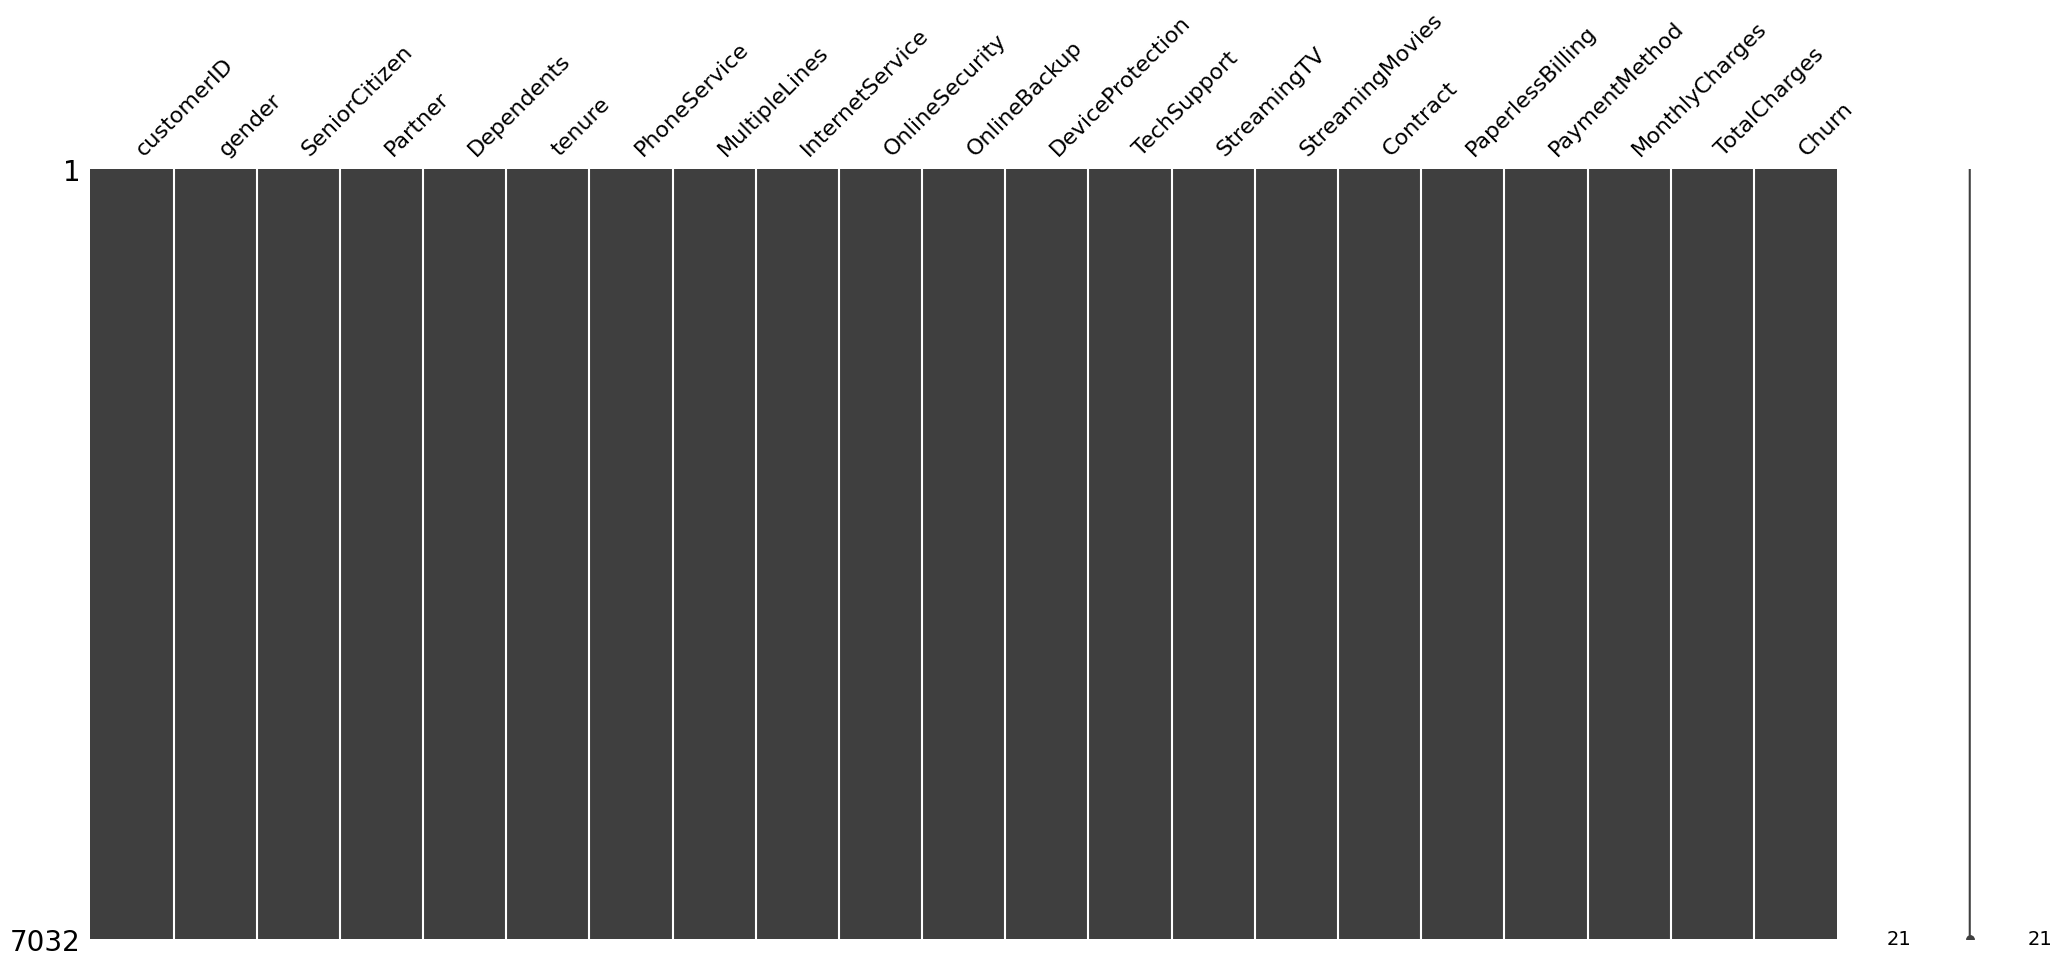

In [8]:
#utilizing the msno library to get another confirmation of no missing values
msno.matrix(main_df)

We can now confirm that all our columns and rows have some sort of data inside, meaning we do not have to deal with nan values

### Dealing with numerical data

#### Exploration

In [9]:
#figuring out what type each column is
main_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
#describe the numerical data
main_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


- Important Notes:
    - Four numeric categories
    -  SeniorCitizen:
        - since this is on a scale of 0-1, we should change this to possibly a boolean value of true or false because we cannot make a 100% accurate guess of the data
    - tenure:
        - N/a
    - MonthlyCharges:
        - N/a
    - Total Charges:
        - N/a

Changing the SeniorCitizen column to a string yes or no

In [11]:
changed_vals = {0: "No", 1: "Yes"}
main_df['SeniorCitizen'] = [changed_vals[value] for value in main_df['SeniorCitizen']]
main_df['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: SeniorCitizen, Length: 7032, dtype: object

Now I will call .describe() again to get a cleaner result

In [12]:
main_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


#### Basic visualizations

**Starting with tenure column**

In [13]:
fig = px.histogram(data_frame=main_df, x='tenure', color='Churn', 
                    color_discrete_sequence=['#ff9a8d', '#aed6dc'], marginal='box', nbins=25, 
                    template='plotly_dark')

fig.update_layout(title='Distribution of Tenure', title_x = 0.5)

In [14]:
fig = px.histogram(data_frame=main_df, x='tenure', facet_col='Churn', facet_col_wrap=2, color='Churn', 
                    width=800, color_discrete_sequence=['#ff9a8d', '#aed6dc'], marginal='box', 
                    nbins=25, template='plotly_dark')
fig.update_layout(title='Distribution of Tenure', title_x = 0.5)


Those who did not churn makes the graph is undefined as both tails are about equal. However, those who did churn represent a right skewed histogram.
- In terms of looking at the boxplot:
    - Those who did not churn:
        - min: 1
        - Q1: 15
        - median: 38
        - Q3: 61
        - max: 72
    - Those who did churn:
        - min: 1
        - Q1: 2
        - median: 10
        - Q3: 29
        - max: 72
        - **IMPORTANT NOTE**
            - We have an upper fence of 69, meaning we have some outliers in those who churned
        


**Moving onto the MonthlyCharges Column**

In [15]:
fig = px.histogram(data_frame=main_df, x='MonthlyCharges', color='Churn', 
                    color_discrete_sequence=['#ff9a8d', '#aed6dc'], marginal='box', nbins=25, 
                    template='plotly_dark')

fig.update_layout(title='Distribution of Monthly Charges', title_x = 0.5)

In [16]:
fig = px.histogram(data_frame=main_df, x='MonthlyCharges', facet_col='Churn', facet_col_wrap=2, color='Churn', 
                    width=800, color_discrete_sequence=['#ff9a8d', '#aed6dc'], marginal='box', 
                    nbins=25, template='plotly_dark')
fig.update_layout(title='Distribution of Monthly Charges', title_x = 0.5)

Based off our side-by-side histograms we see that those who did not churn has a skewed right distribution where there are a lot of people who see low monthly charges. In comparison, we have a skewed left distribution on those who did churn as it looks like those who did churn had decently high monthly charges. <br><br>

- In terms of looking at the boxplot:
    - Those who did not churn:
        - min: 18.25
        - Q1: 25.1
        - median: 64.45
        - Q3: 88.4875
        - max: 118.75
    - Those who did churn:
        - min: 18.85
        - Q1: 56.15
        - median: 79.65
        - Q3: 94.2125
        - max: 118.35

**Moving on to TotalCharges column**

In [17]:
fig = px.histogram(data_frame=main_df, x='MonthlyCharges', color='Churn', 
                    color_discrete_sequence=['#ff9a8d', '#aed6dc'], marginal='box', nbins=25, 
                    template='plotly_dark')

fig.update_layout(title='Distribution of Total Charges', title_x = 0.5)

In [21]:
fig = px.histogram(data_frame=main_df, x='TotalCharges', facet_col='Churn', facet_col_wrap=2, color='Churn', 
                    width=800, color_discrete_sequence=['#ff9a8d', '#aed6dc'], marginal='box', 
                    nbins=25, template='plotly_dark')
fig.update_layout(title='Distribution of Total Charges', title_x = 0.5)

Based off our side-by-side histograms we see that both histograms result in a skewed right distribution. <br><br>

- In terms of looking at the boxplot:
    - Those who did not churn:
        - min: 18.8
        - Q1: 577.4875
        - median: 1,683.6
        - Q3: 4,264.188
        - max: 8,672.45
    - Those who did churn:
        - min: 18.85
        - Q1: 134.4625
        - median: 703.55
        - Q3: 2,332.3
        - max: 117.45
        - **IMPORTANT NOTE**:
            - we have an upper fence of 5,624.85, meaning we have values that are outliers

#### Detecting outliers for the numeric values

First, since the churn column is a string, I will create a temporary dataframe to change the churn to an integer to find the correlation of the numeric values with it

In [22]:
# changed_vals = {'No': 0, 'Yes': 1}
# temp_churn_df = main_df
# temp_churn_df['Churn'] = [changed_vals[value] for value in temp_churn_df['Churn']]

In [26]:
# temp_churn_df.corr()['Churn'].sort_values()

tenure           -0.354049
TotalCharges     -0.199484
MonthlyCharges    0.192858
Churn             1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

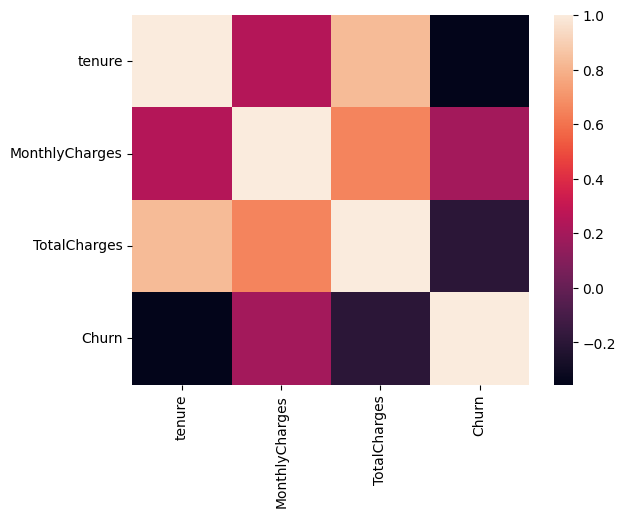

In [24]:
# sns.heatmap(temp_churn_df.corr())

Based on this correlation, we see that tenure and TotalCharges are negatively correlated with the churn, meaning that they are almost irrelevant variables to consider. We see that there is weak positive correlation with churn and MonthlyCharges.

In [41]:
#tenure above 69 where they churn are outliers
tmp = main_df
tmp = tmp[tmp['Churn'] == 1]
tmp = tmp[tmp['tenure'] <= 69]

69